# Simple Correspondence Analysis (CA) 

In [1]:
import pandas as pd
import itertools

import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

## Case 1: Application chi^2 to health people:

- Direct computation from a contingency table:

In [2]:
import numpy as np
from scipy.stats import chi2_contingency

In [3]:
d = np.array([[24,168], [10, 282]])  # absolute frecuency (contingency table)
chi2 = chi2_contingency(d) 

print("Chi^2 value: ", chi2[0])
print("Frecuencia esperada (f0):", chi2[3])

Chi^2 value:  13.250634363715045
Frecuencia esperada (f0): [[ 13.48760331 178.51239669]
 [ 20.51239669 271.48760331]]


In [4]:
# otros estadísticos:
print("Valor de p: ", chi2[1])
print("Grados de libertad: ", chi2[2])

Valor de p:  0.00027248764114626414
Grados de libertad:  1


## Case 2: Application for discovery authors of novels

Source: https://github.com/elena-sharova/correspondence_analysis/blob/master/CorrespondenceAnalysis.ipynb


- Descripción del dataset:

Inspirado en cómo Donald Foster identificó a los autores de varias obras anónimas. La metodología de Foster examina un amplio espectro de características del texto, incluida la elección de palabras, puntuación, estructura gramatical y similares.

El objetivo del ejercicio de este artículo es emular a Foster, aunque, de una manera simplicada utilizando el análisis de correspondencia.

Si nos dan dos fragmentos de texto escritos por uno o dos de estos escritores, nuestro trabajo es identificar al verdadero autor(es). 

La única información que nos dan sobre un fragmento de texto es la frecuencia con la que aparecen ciertas letras en él.

En consecuencia, he tomado tres muestras distintas de aproximadamente 1000 caracteres cada una de los escritos de cada uno de estos autores, y he sumado el número de veces que cada uno de los siguientes caracteres aparece en cada una de las muestras (restringirnos a menos del alfabeto completo evita la tablas en el resto de la discusión se vuelven difíciles de manejar; los personajes elegidos ocurren con una frecuencia media en todos los textos en su conjunto). 

In [5]:
# 5 autores de obras clásicas
authors = ["Charles Darwin", "Rene Descartes","Thomas Hobbes", "Mary Shelley", "Mark Twain"]

#Letras asociadas a los autores:
initials=['CD1','CD2','CD3','RD1','RD2','RD3','TB1','TB2','TB3','MS1','MS2','MS3','MT1','MT2','MT3']

In [6]:
# Preparar los datos hasta obtener una tabla de contingencia

author_num = [[ a +": "+str(i) for i in [1,2,3]] for a in authors]
author_num

[['Charles Darwin: 1', 'Charles Darwin: 2', 'Charles Darwin: 3'],
 ['Rene Descartes: 1', 'Rene Descartes: 2', 'Rene Descartes: 3'],
 ['Thomas Hobbes: 1', 'Thomas Hobbes: 2', 'Thomas Hobbes: 3'],
 ['Mary Shelley: 1', 'Mary Shelley: 2', 'Mary Shelley: 3'],
 ['Mark Twain: 1', 'Mark Twain: 2', 'Mark Twain: 3']]

In [7]:
# Crear una lista de autores y su número:
authorSamples = list(itertools.chain.from_iterable(author_num))
authorSamples

['Charles Darwin: 1',
 'Charles Darwin: 2',
 'Charles Darwin: 3',
 'Rene Descartes: 1',
 'Rene Descartes: 2',
 'Rene Descartes: 3',
 'Thomas Hobbes: 1',
 'Thomas Hobbes: 2',
 'Thomas Hobbes: 3',
 'Mary Shelley: 1',
 'Mary Shelley: 2',
 'Mary Shelley: 3',
 'Mark Twain: 1',
 'Mark Twain: 2',
 'Mark Twain: 3']

In [8]:
# frecuencia con la que aparecen ciertas letras (16) en el fragmento a analizar.

chars=["B", "C", "D", "F", "G", "H", "I", "L", "M", "N","P", "R", "S", "U", "W", "Y"]

In [9]:
# La tabla de contingencia construida a partir de la frecuencia con la que aparecen las letras
# en tres pasajes por autor es: 

sampleCrosstab=[[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]


¿Podemos encontrar alguna diferencia en el uso de letras por autor utilizando la matriz de contingencia?
Es casi imposible hacerlo con solo mirarlo. En cambio, CA recurre a la estadística chi^2. Cuanto mayor es chi^2, mayor es la certeza de que exista asociación entre un framento de texto y su autor.

In [10]:
# Crear tabla de contingencia:

dfTableForm = pd.DataFrame(data=np.transpose(sampleCrosstab), columns=authorSamples)
dfTableForm.index = chars
dfTableForm.head()

,Charles Darwin: 1,Charles Darwin: 2,Charles Darwin: 3,Rene Descartes: 1,Rene Descartes: 2,Rene Descartes: 3,Thomas Hobbes: 1,Thomas Hobbes: 2,Thomas Hobbes: 3,Mary Shelley: 1,Mary Shelley: 2,Mary Shelley: 3,Mark Twain: 1,Mark Twain: 2,Mark Twain: 3
B,34,18,32,13,8,9,15,18,19,13,17,13,16,15,19
C,37,33,43,31,28,34,20,14,18,29,34,22,18,21,17
D,44,47,36,55,34,43,28,40,41,49,43,43,56,66,70
F,27,24,12,29,24,25,18,25,26,31,29,16,13,21,12
G,19,14,21,15,17,18,19,21,19,16,14,11,27,19,28


## Calcular Chi-Squared

La prueba chi^2 (independencia de Pearson) se puede utilizar para decir con certeza razonable si la distribución de las letras difiere de un autor a otro. 

In [11]:
# Quick check - compare to scipy Chi-Squared test
x2, prob, dof, fe = chi2_contingency(sampleCrosstab)
print(x2)


448.49666422103445


Al ser chi^2 = 448,50 se detecta que es muy poco probable que las frecuencias de las letras siguen la misma distribución (hipótesis nula), es decir, existen diferencias por autor.


## Calcular CA utilizando la librería prince


Una vez establecido chi^2, podemos continuar con la CA, ya que ahora sabemos que debería poder mostrarnos algunas asociaciones significativas. 

### Prince library:

Library: pip3 install  prince
Documentation: https://awesomeopensource.com/project/MaxHalford/prince



In [12]:
import prince
ca = prince.CA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=123
    )

ca = ca.fit(dfTableForm)

In [13]:
ca.row_coordinates(dfTableForm)  # letras

,0,1
B,-0.067801,0.251874
C,-0.186781,0.206641
D,0.189076,0.045753
F,-0.132993,-0.046796
G,0.142068,-0.028568
H,-0.004141,-0.123746
I,-0.037227,-0.017651
L,0.150109,0.174766
M,-0.101342,-0.086505
N,-0.014181,-0.090968


In [14]:
ca.column_coordinates(dfTableForm) # autores

,0,1
Charles Darwin: 1,-0.070977,0.200620
Charles Darwin: 2,-0.062109,0.094512
Charles Darwin: 3,-0.148509,0.158889
Rene Descartes: 1,0.030697,0.019028
Rene Descartes: 2,-0.069552,-0.068382
Rene Descartes: 3,-0.115119,-0.063805
Thomas Hobbes: 1,-0.006890,-0.103594
Thomas Hobbes: 2,-0.053382,-0.170423
Thomas Hobbes: 3,-0.083822,-0.121758
Mary Shelley: 1,-0.016408,0.001383


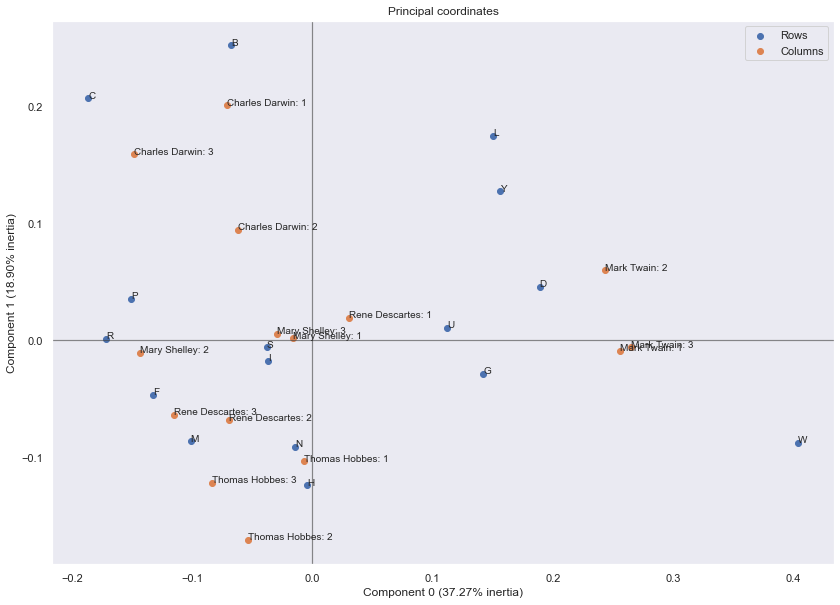

In [15]:
# Visualizar
ax = ca.plot_coordinates(
    X=dfTableForm,
    ax=None,
    figsize=(14, 10),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True
)

In [16]:
# Al igual que para el PCA, se puede acceder a la contribución de inercia de cada componente principal,
# así como a los valores propios y la inercia total. 

print(ca.eigenvalues_)
print(40*'-')
print(ca.total_inertia_)
print(40*'-')
print(ca.explained_inertia_)

[0.018582834059844573, 0.009425336229149458]
----------------------------------------
0.04986620682911214
----------------------------------------
[0.37265385200696316, 0.18901249620708865]


# Multiple Correspondence analysis 

## Application on adult+stretch Dataset

Code source: https://www.it-swarm-es.com/es/python-3.x/usando-el-paquete-mca-en-python/836313120/
Code source: https://github.com/MaxHalford/prince
Data source: https://archive.ics.uci.edu/ml/datasets/balloons



### Description of the dataset: balloon


- adult-stretch.data Inflated is true if age=adult or act=stretch. experimento de psicología cognitiva.


(Classes Inflated T or F)

- Color: yellow, purple
- size: large, small
- act: stretch, dip
- age: adult, child
- inflated: T, F

In [28]:
# Primero construimos dataframe.

import pandas as pd 

X = pd.read_csv('data/adult+stretch.data')
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']

print(X.head())

mca = prince.MCA(); mca
X

    Color   Size   Action    Age Inflated
0  YELLOW  SMALL  STRETCH  ADULT        T
1  YELLOW  SMALL  STRETCH  CHILD        F
2  YELLOW  SMALL      DIP  ADULT        F
3  YELLOW  SMALL      DIP  CHILD        F
4  YELLOW  LARGE  STRETCH  ADULT        T


,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,F
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,F
7,YELLOW,LARGE,DIP,ADULT,F
8,YELLOW,LARGE,DIP,CHILD,F
9,PURPLE,SMALL,STRETCH,ADULT,T


In [18]:
# Llamar al método fit.

# The MCA also implements the fit

import prince
mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
    )
mca = mca.fit(X)



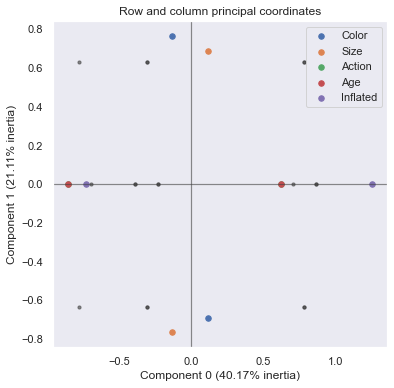

In [19]:
# imprimir el diagrama de la imagen

ax = mca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

ax.get_figure().savefig('mca_coordinates.svg')


In [20]:
# Contribución de inercia de cada componente principal:

print(mca.eigenvalues_)
print(40*'-')
print(mca.total_inertia_)
print(40*'-')
print(mca.explained_inertia_)

[0.4016565656013381, 0.21111111111111103]
----------------------------------------
1.0
----------------------------------------
[0.4016565656013381, 0.21111111111111103]


## MCA sobre datos de restaurant

In [21]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from termcolor import colored  # Formatear salida, instalar

tips_df = sns.load_dataset('tips')
tips_df.head()

tips_cat = tips_df.drop(['total_bill', 'tip', 'size'], axis=1); tips_cat

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [26]:
tips_num = tips_df.drop(['sex', 'smoker', 'day', 'time'], axis=1); 
tips_num

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [31]:
import prince
mca = prince.MCA(
    n_components=2,
    n_iter=4,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
    )
mca = mca.fit(tips_cat)

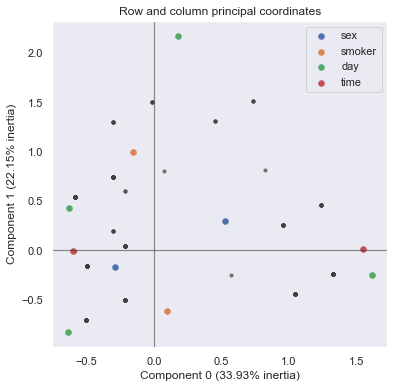

In [32]:

ax = mca.plot_coordinates(
     X=tips_cat,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

ax.get_figure().savefig('mca_coordinates.svg')
